In [1]:
import pandas as pd

In [2]:
from orbit_generation.dataset import get_first_period_dataset, get_orbit_classes
from orbit_generation.data import sample_orbits
from orbit_generation.propagation import calculate_errors
from orbit_generation.constants import EM_MU, ORBIT_FAMILIES, EM_POINTS
from orbit_generation.visualize import plot_grouped_features, plot_value_proportions, visualize_static_orbits, plot_3d_points, plot_histogram
from orbit_generation.stats import plot_histograms_position

# Data Import

In [3]:
data_path = r"/orbit-generation/data/orbits_fix_1500/EM_N_fix_1500.h5"
data, orbit_df, _,_ = get_first_period_dataset(file_path=data_path, segment_length=100)

## Orbit Array

The orbital data is a 3D array of positions with shape: (samples, features, seq_len)

In [4]:
data.shape

(45211, 7, 100)

In [5]:
print(f'The Earth-Moon system data contains {data.shape[0]} orbits.')

The Earth-Moon system data contains 45211 orbits.


## Orbit Feature Dataframe

Each orbit in the dataframe corresponds to the same index-row in the Dataframe

In [6]:
orbit_df.shape

(45211, 11)

In [7]:
print(f'The dataframe contains features for {orbit_df.shape[0]} orbits.')

The dataframe contains features for 45211 orbits.


In [8]:
def rename_second_x0(df):
    cols = df.columns.tolist()
    x0_indices = [i for i, col in enumerate(cols) if col == 'x_0']
    if len(x0_indices) >= 2:
        cols[x0_indices[1]] = 'z_0'
        df.columns = cols
    return df

# Usage
orbit_df = rename_second_x0(orbit_df)

In [9]:
orbit_df.head()

,id_class,x_0,y_0,z_0,vx_0,vy_0,vz_0,jacobi,period,stability,propagated_periods
0,1.0,0.941000,1.900442e-23,0.509474,2.968938e-13,-0.124968,-3.122717e-12,2.745412,11.555291,211.184678,3.0
1,1.0,0.941538,-8.592698e-24,0.508602,2.902340e-13,-0.125672,-3.252212e-12,2.746226,11.551622,210.329145,3.0
2,1.0,0.942076,6.956604e-24,0.507729,2.685527e-13,-0.126375,-2.862050e-12,2.747039,11.547936,209.473685,3.0
3,1.0,0.942613,1.763946e-24,0.506856,3.153637e-13,-0.127078,-3.791054e-12,2.747850,11.544233,208.618315,3.0
4,1.0,0.943150,9.441804e-24,0.505982,2.663322e-13,-0.127781,-2.982720e-12,2.748660,11.540511,207.763051,3.0


Orbit dataframe columns:
- **`id_class`**: Represents the family ID of the orbit, identifying the specific class or category the orbit belongs to.
- **Initial Conditions**:
  - **`x_0`**: Initial x-coordinate of position.
  - **`y_0`**: Initial y-coordinate of position.
  - **`z_0`**: Initial z-coordinate of position.
  - **`vx_0`**: Initial x-component of velocity.
  - **`vy_0`**: Initial y-component of velocity.
  - **`vz_0`**: Initial z-component of velocity.
- **`jacobi`**: The Jacobi constant of the orbit, a conserved energy quantity useful for characterizing orbit dynamics.
- **`period`**: The period of the orbit, indicating the time it takes to complete one cycle.
- **`stability`**: A measure of the orbit’s stability, often calculated based on eigenvalues or other indicators.


# Exploratory Data Analysis (EDA)
of the Earth-Moon System

## Family Proportion

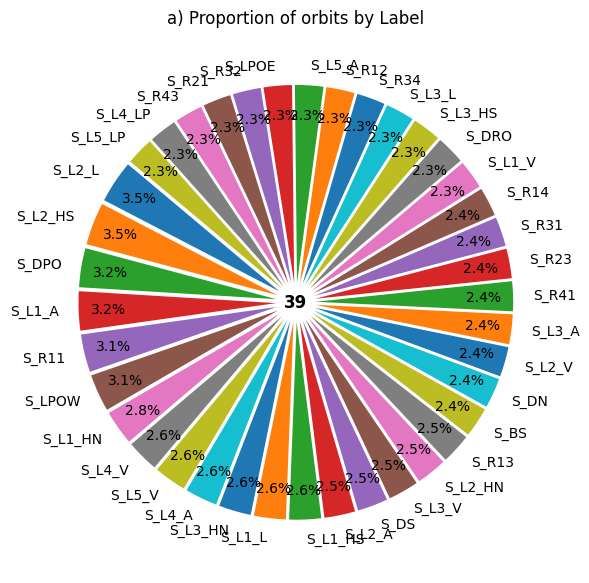

In [10]:
# Plotting the proportions using the names of the families contained in ORBIT_FAMILIES
plot_value_proportions(data=orbit_df['id_class'].to_list(), classification_df=ORBIT_FAMILIES, id_col_classification='Id')

The number of orbits is approximately evenly distributed across each family.

## Initial Conditions

You can either take the initial conditions from the array or from the dataframe

In [11]:
ics_0 = data[0, 1:, 0]
print(f'The initial conditions of the first orbit are \n{ics_0}')

ics_0 = orbit_df.loc[0, ['x_0', 'y_0', 'z_0', 'vx_0', 'vy_0', 'vz_0']].to_list()
print(f'The initial conditions of the first orbit are \n{ics_0}')

The initial conditions of the first orbit are 
[ 9.40999793e-01  1.90044160e-23  5.09474300e-01  2.96893791e-13
 -1.24968020e-01 -3.12271707e-12]
The initial conditions of the first orbit are 
[0.940999792653582, 1.9004415956504988e-23, 0.5094742997896742, 2.968937906644994e-13, -0.1249680203755695, -3.1227170661082715e-12]


In [12]:
initial_conditions = data[:, 1:, 0:1]

In [13]:
# plot_3d_points(initial_conditions,plot_velocity=True)

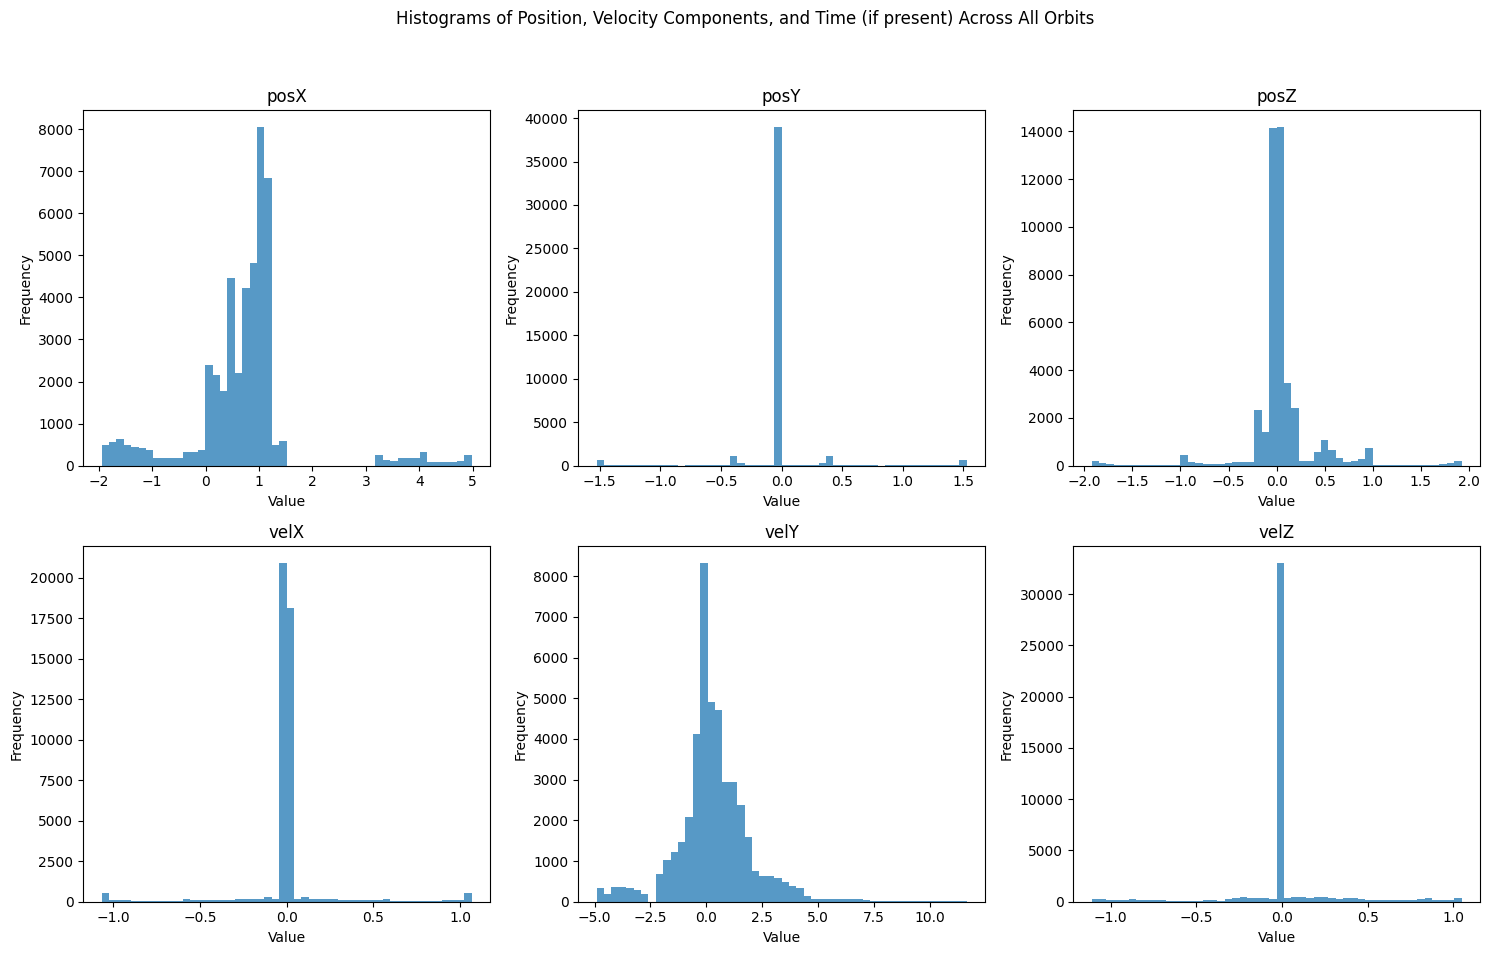

In [14]:
plot_histograms_position(initial_conditions)

## Orbital Features

In [15]:
orbit_df_with_classes = pd.merge(orbit_df, ORBIT_FAMILIES, how='left', left_on='id_class', right_on='Id')

### Jacobi

Whole Dataset

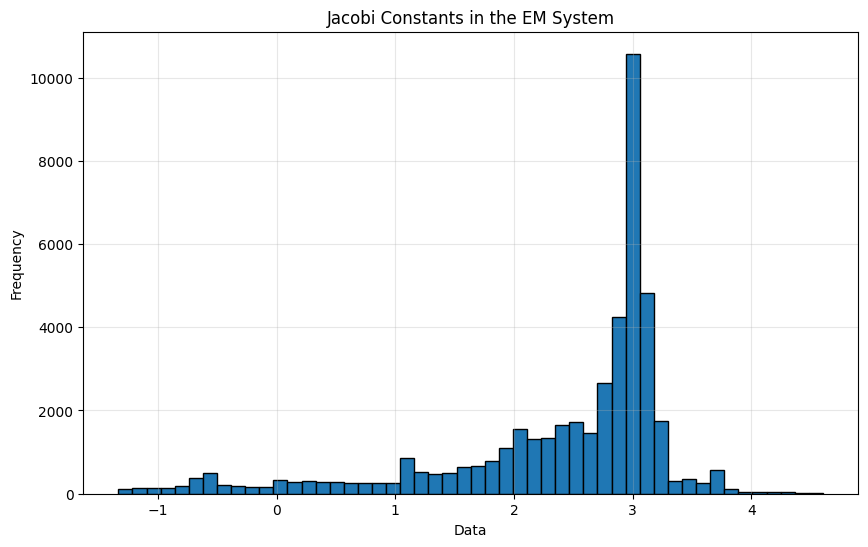

In [16]:
plot_histogram(orbit_df['jacobi'], bins=50, title='Jacobi Constants in the EM System')

By Familiy

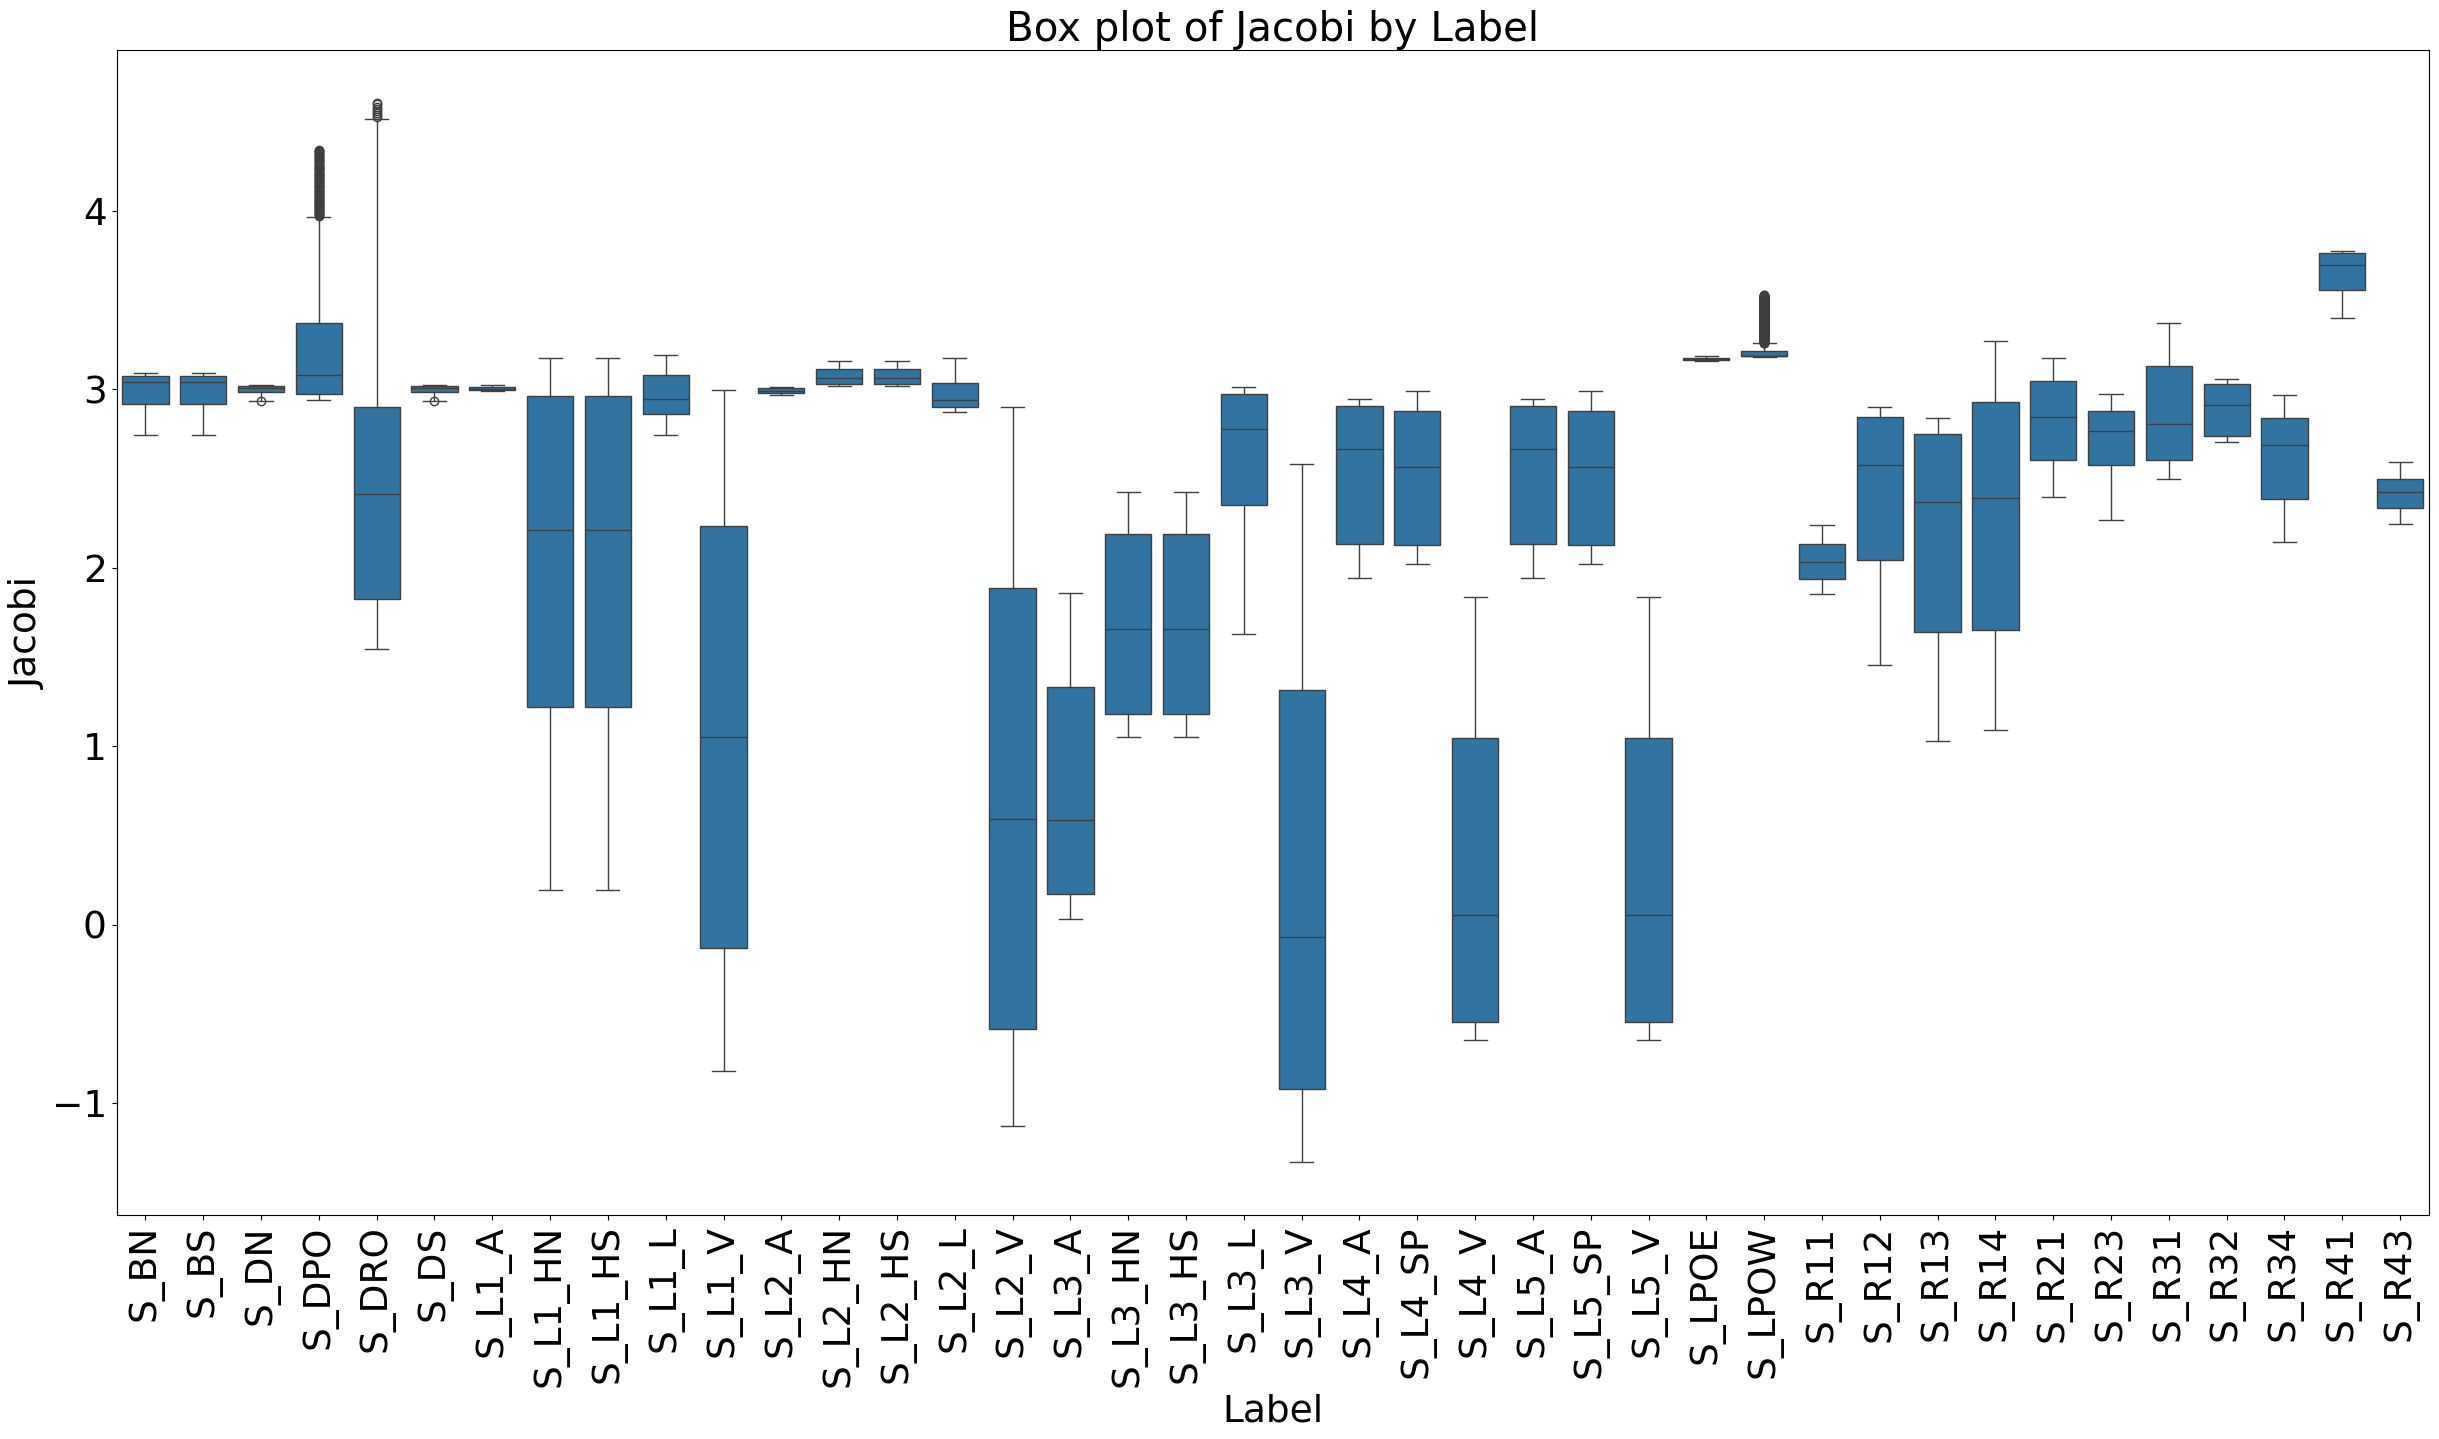

In [17]:
plot_grouped_features(df=orbit_df_with_classes, columns=['jacobi'], group_col='Label', plot_type='box', figsize=(25,15), fontsize=27)

### Period

Whole Dataset

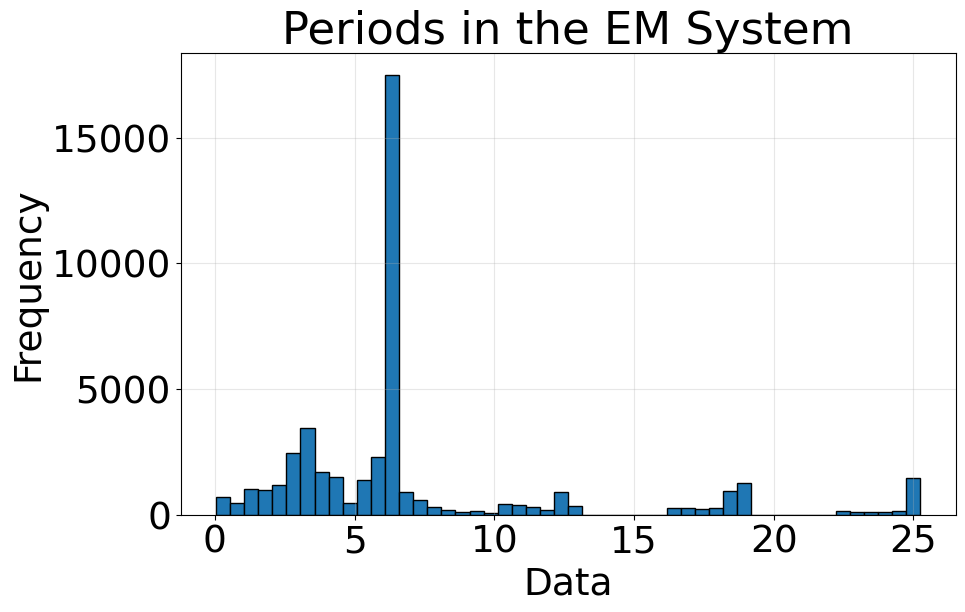

In [18]:
plot_histogram(orbit_df['period'], bins=50, title='Periods in the EM System')

By Family

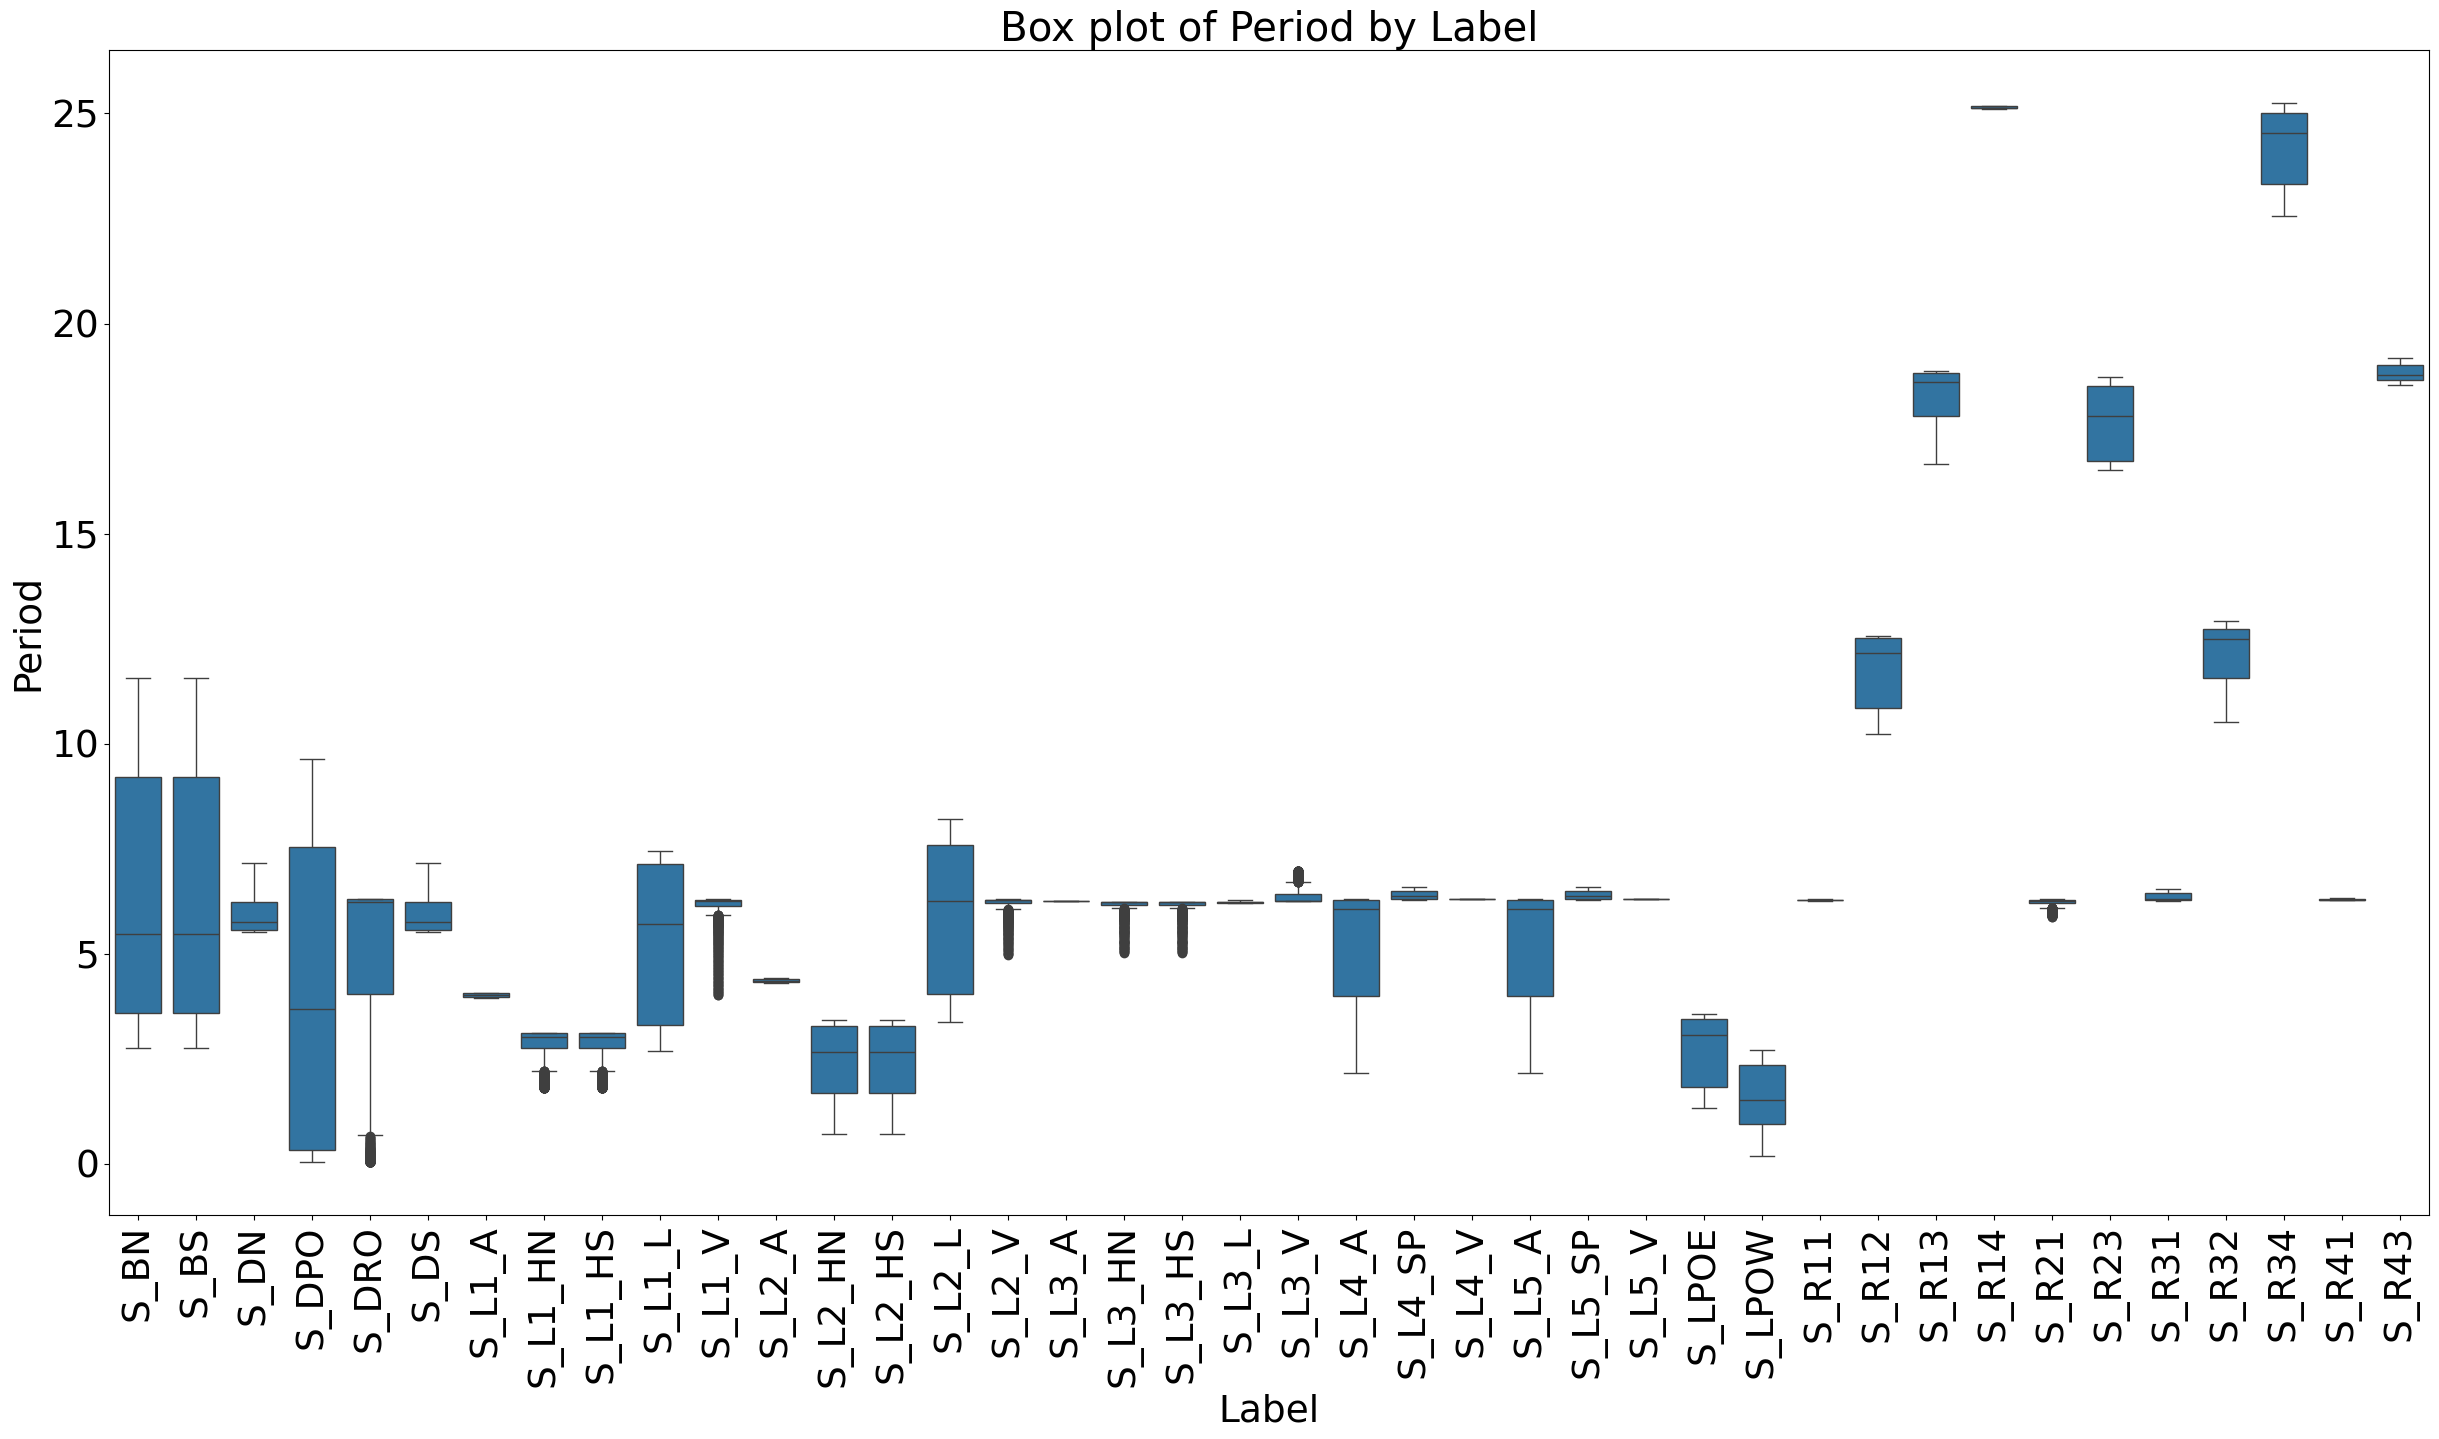

In [19]:
plot_grouped_features(df=orbit_df_with_classes, columns=['period'], group_col='Label', plot_type='box', figsize=(25,15), fontsize=27)

### Stability

Whole Dataset

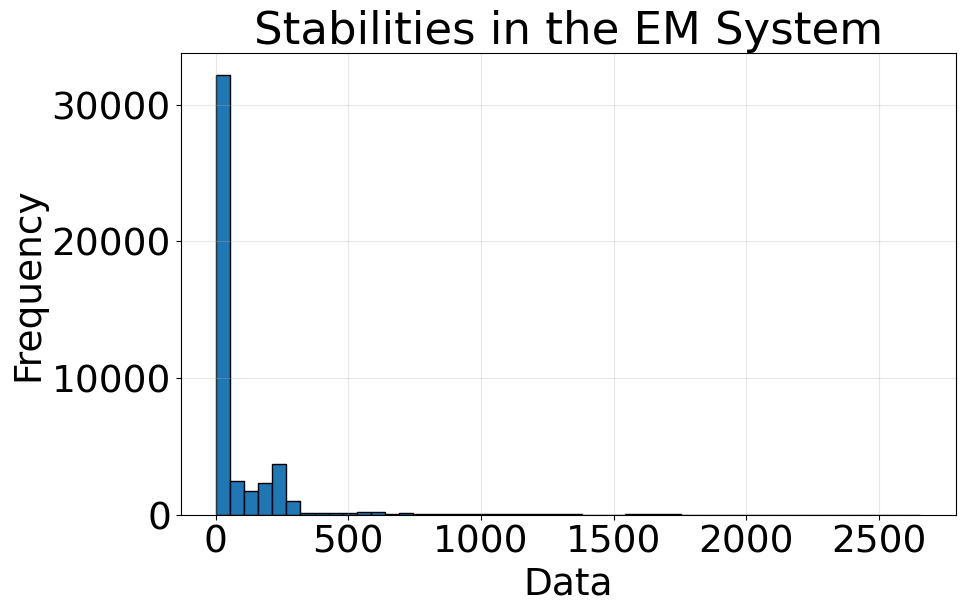

In [20]:
plot_histogram(orbit_df['stability'], bins=50, title='Stabilities in the EM System')

By Family

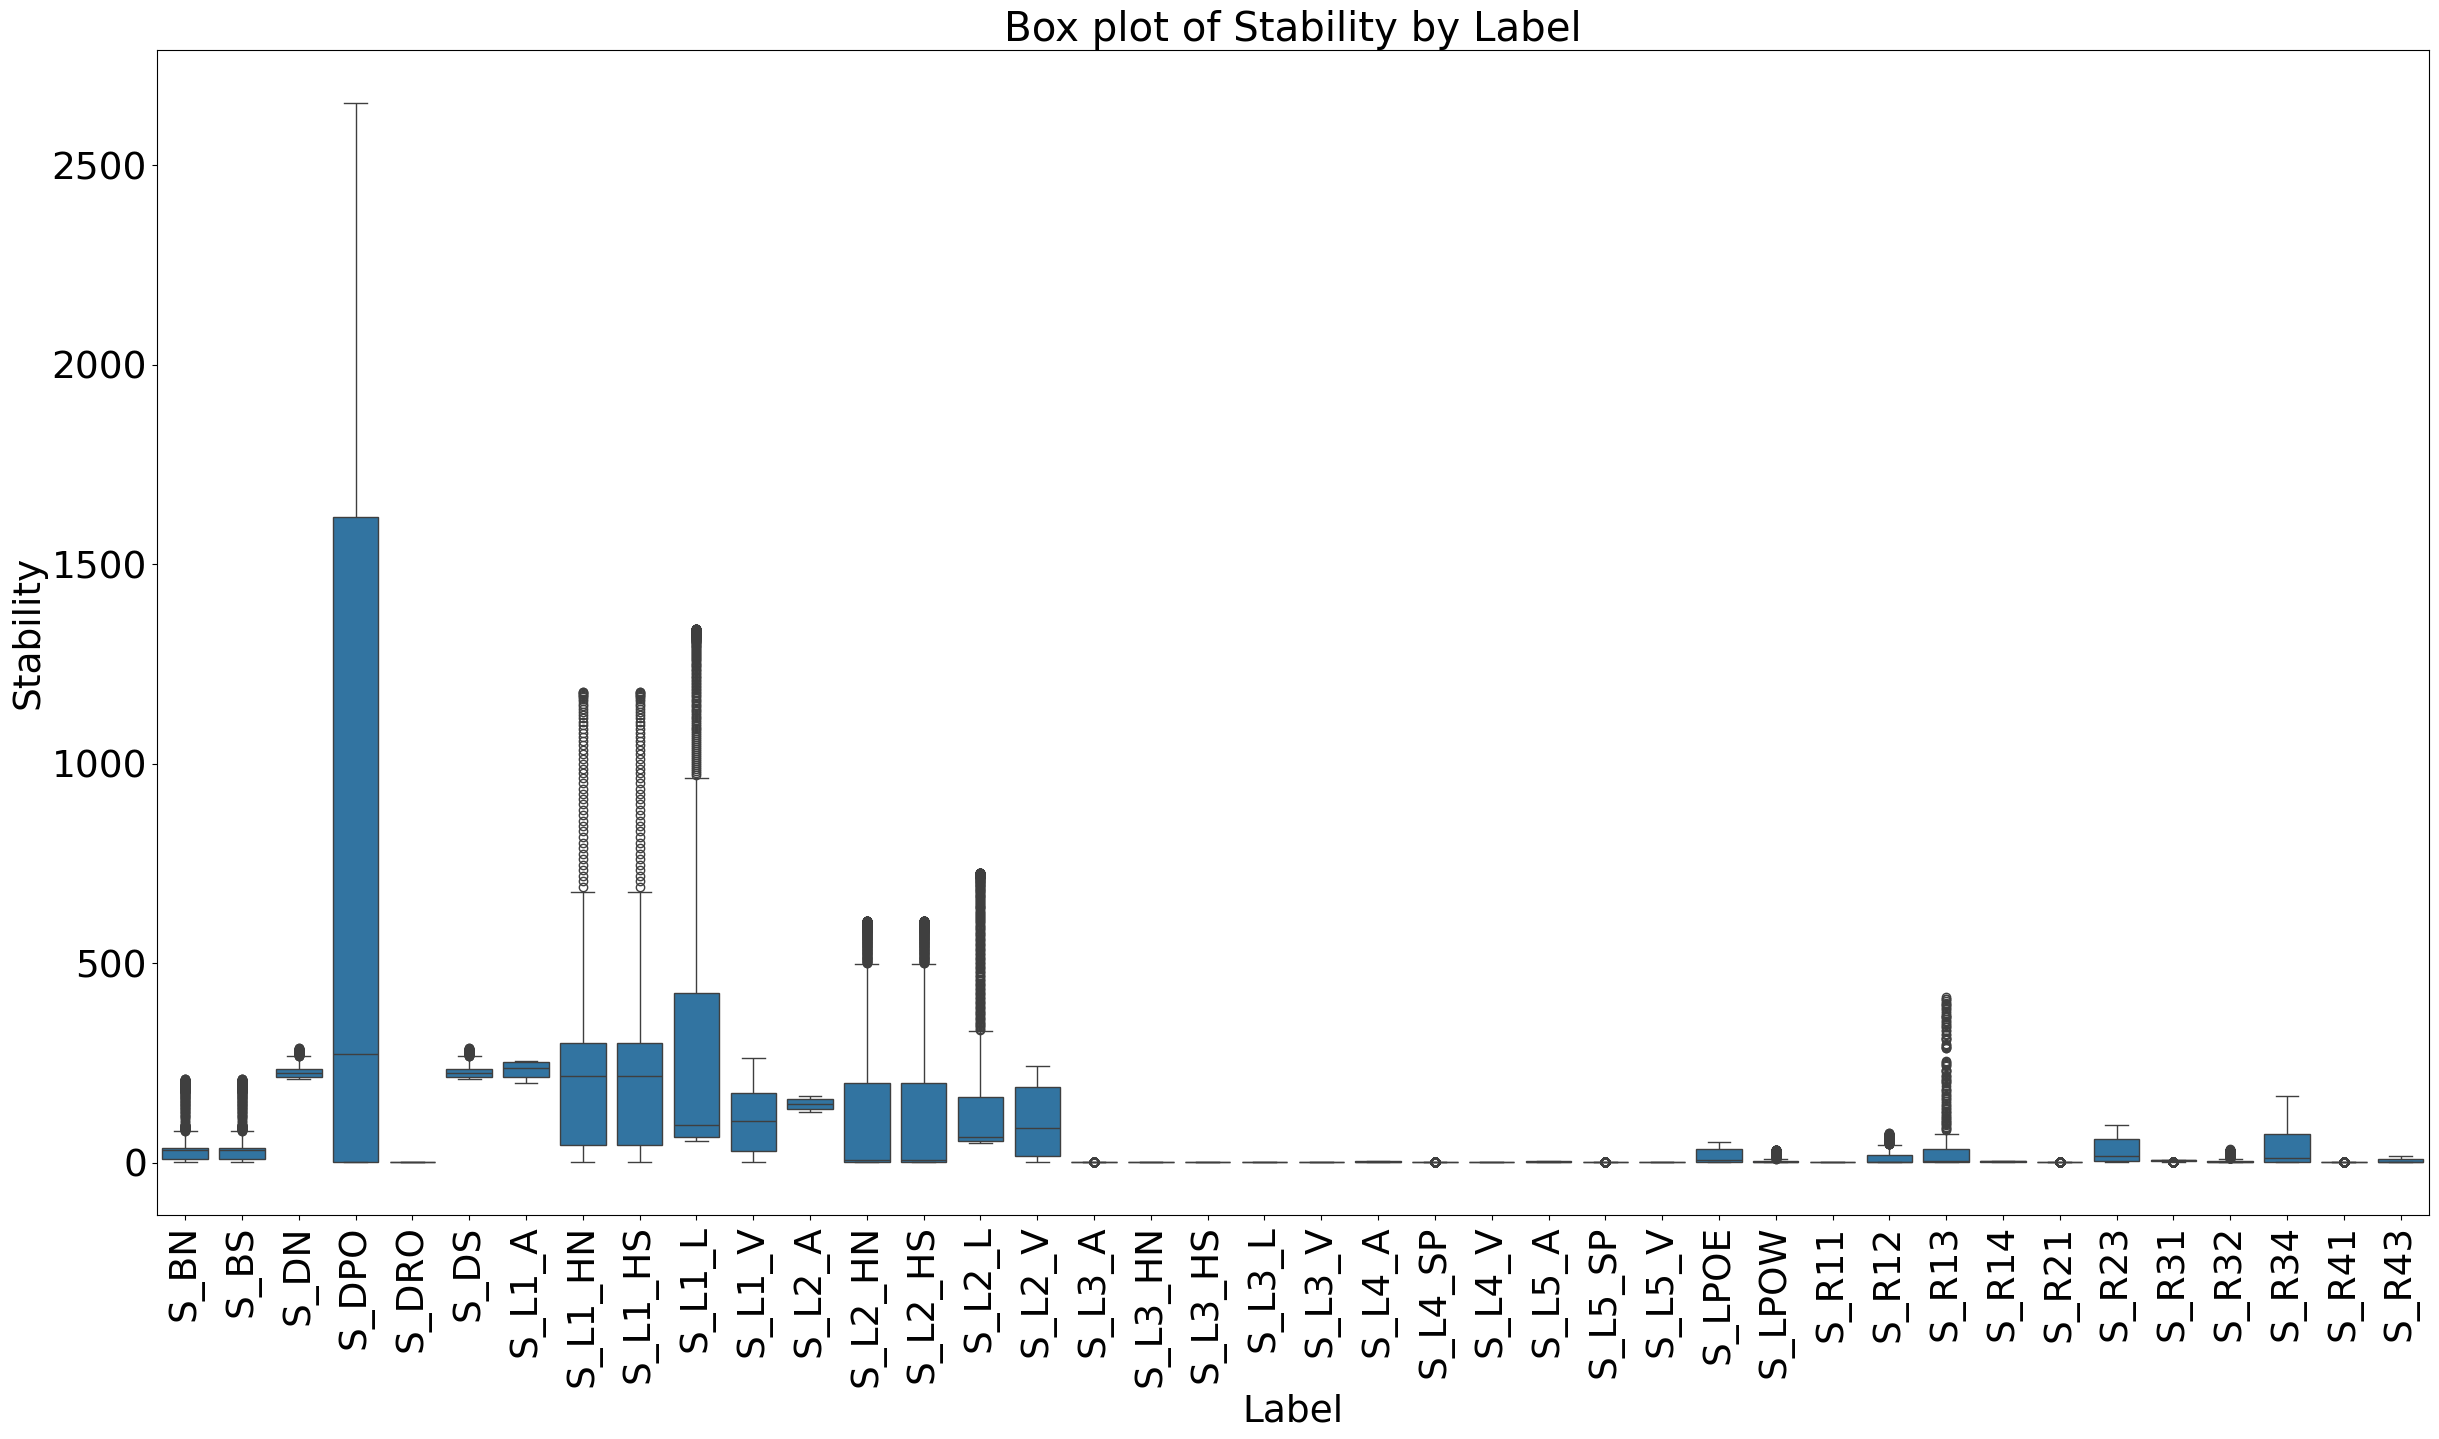

In [21]:
plot_grouped_features(df=orbit_df_with_classes, columns=['stability'], group_col='Label', plot_type='box', figsize=(25,15), fontsize=27)

### Together

In [22]:
features = orbit_df[['period', 'jacobi', 'stability']].values
family_labels = get_orbit_classes(orbit_df['id_class'])[0]

In [ ]:
plot_3d_points(features, family_labels, figsize=(20,20))

## Orbits

In [ ]:
num_samples= 1000
sampled_orbits, sampled_labels = sample_orbits(orbit_data=data, sample_spec=num_samples)

### Visualization

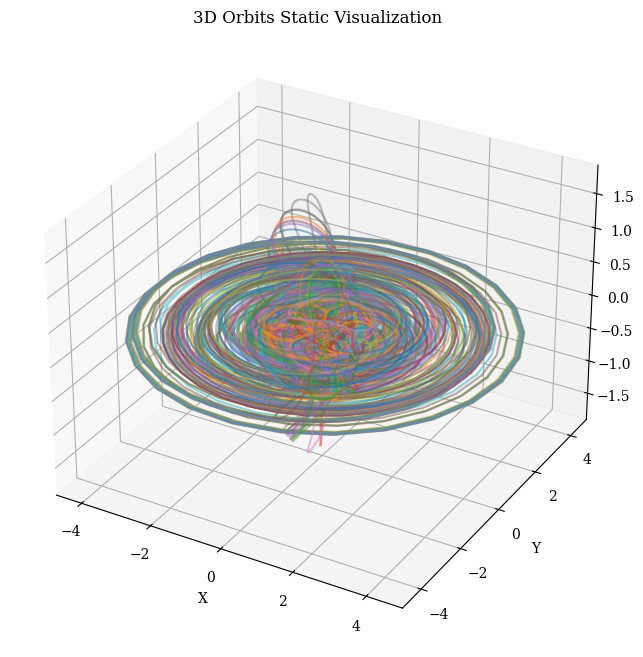

In [ ]:
visualize_static_orbits(sampled_orbits[:,1:,:], show_legend=False)

### Distribution

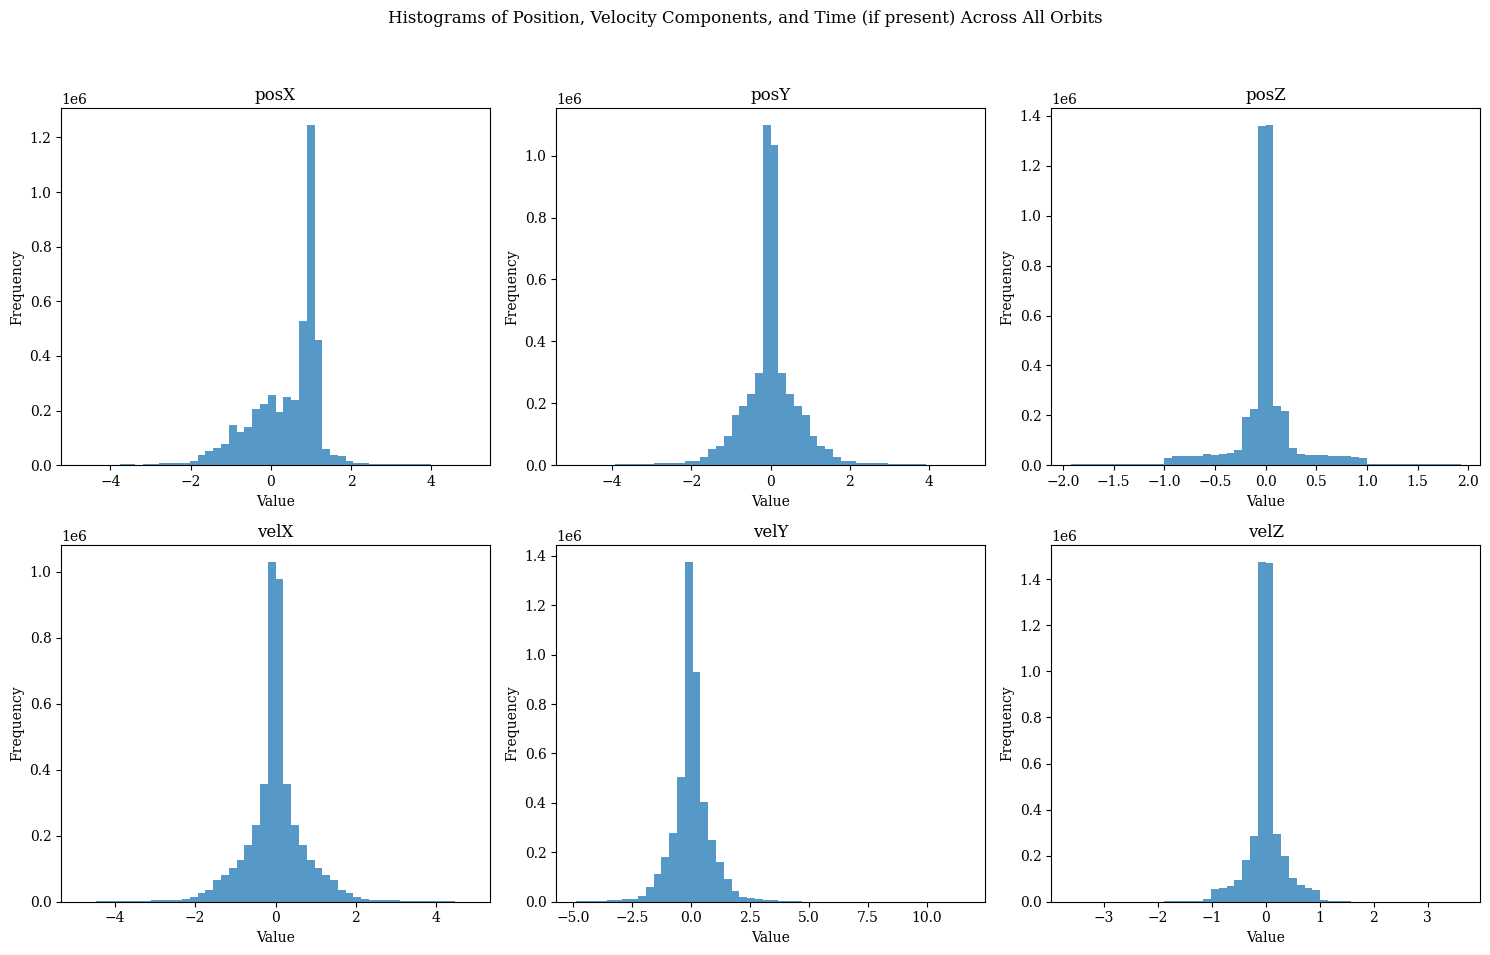

In [ ]:
plot_histograms_position(data[:,1:,:])

### Propagated Errors

Cumulative position error for selected orbits: 0.854633294336051
Average position error per time step: 8.63265953874799e-06


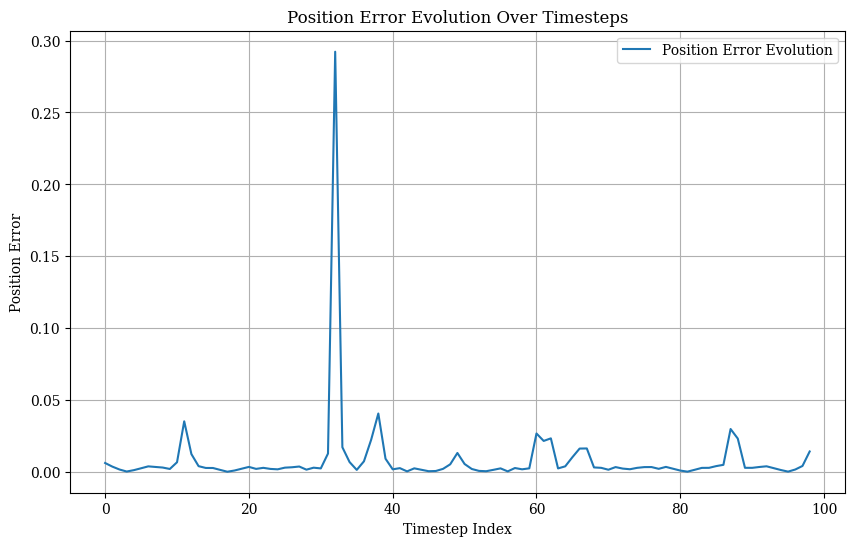

Cumulative velocity error for selected orbits: 12.038280831683208
Average velocity error per time step: 0.00012159879627962836


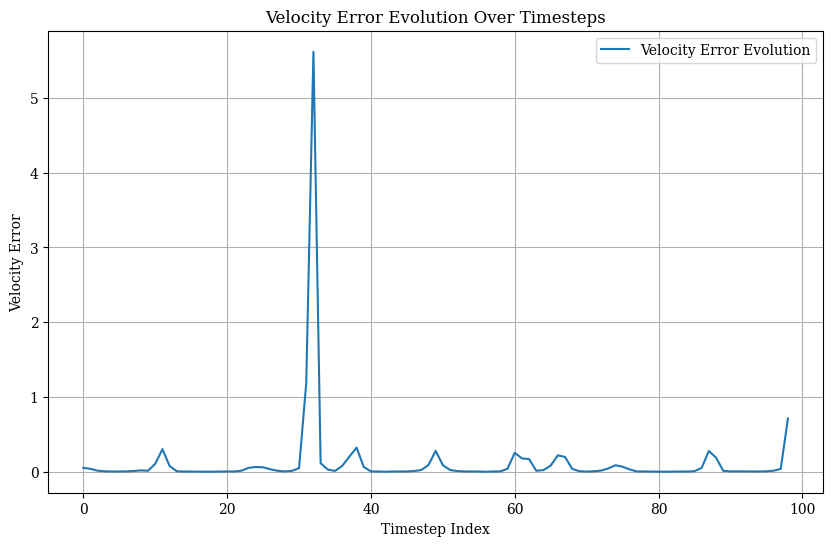

Cumulative energy error for selected orbits: 11.260487368336454
Average energy error per time step: 0.00011374229664986317


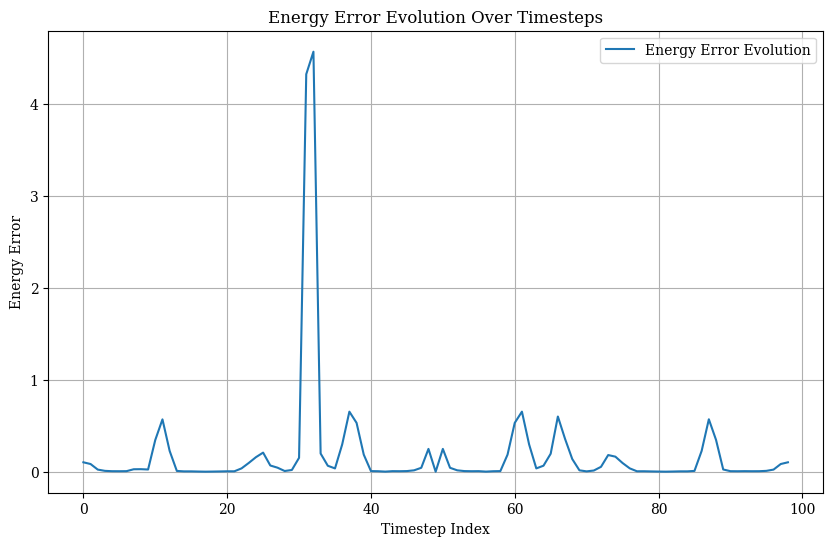

In [ ]:
errors = calculate_errors(sampled_orbits, EM_MU)